In [2]:
#Here is the libraries that I need to import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# I did not have mlxtend librarie as stack then I installed.
!pip install mlxtend

In [3]:
#After I have installed that I import them
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import apriori

In [ ]:
"""
According to steps firstly, I will check the null values and understand if any problem that I need to preprocess before the 
apllying algortimhs. I will check, types, distribution, nans. After that, I will pass the second stage (analysing data). 
"""

In [4]:
#First step I read the data
data = pd.read_csv('data.csv')

In [5]:
data

,Member_no,Date,item
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [6]:
# I just check if any  null belong in data. As a result, there was no null.
number_of_NuN_values = data.isnull().any(axis = 1)
NaN = data[number_of_NuN_values]

print(len(NaN))

0


In [7]:
# Here we have 3 columns info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Member_no  38765 non-null  int64 
 1   Date       38765 non-null  object
 2   item       38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [8]:
#Here the description of items. 
data.item.describe()

count          38765
unique           167
top       whole milk
freq            2502
Name: item, dtype: object

In [9]:
#Here the description of Member_no. 
data.Member_no.describe()

count    38765.000000
mean      3003.641868
std       1153.611031
min       1000.000000
25%       2002.000000
50%       3005.000000
75%       4007.000000
max       5000.000000
Name: Member_no, dtype: float64

In [10]:
#Here the description of Date. 
data.Date.describe()

count          38765
unique           728
top       21-01-2015
freq              96
Name: Date, dtype: object

In [11]:
#Here, I just check items one by one to see items column what it contains
for i in range(len(data.item)):
    print(data.item[i])

tropical fruit
whole milk
pip fruit
other vegetables
whole milk
rolls/buns
other vegetables
pot plants
whole milk
tropical fruit
citrus fruit
beef
frankfurter
chicken
butter
fruit/vegetable juice
packaged fruit/vegetables
chocolate
specialty bar
other vegetables
butter milk
whole milk
tropical fruit
tropical fruit
bottled water
yogurt
sausage
other vegetables
brown bread
yogurt
hamburger meat
root vegetables
pork
beef
pastry
fruit/vegetable juice
canned beer
root vegetables
citrus fruit
sausage
tropical fruit
berries
canned beer
butter milk
coffee
pastry
rolls/buns
misc. beverages
root vegetables
sausage
canned beer
ham
turkey
whole milk
whole milk
packaged fruit/vegetables
rolls/buns
ham
rolls/buns
other vegetables
sausage
sausage
frankfurter
rolls/buns
whole milk
curd cheese
red/blush wine
sausage
tropical fruit
red/blush wine
whole milk
frankfurter
whole milk
frozen potato products
other vegetables
citrus fruit
flour
sugar
frozen meals
chocolate
root vegetables
root vegetables
herbs

sliced cheese
soda
ham
salty snack
whole milk
root vegetables
soda
curd
bottled water
packaged fruit/vegetables
tropical fruit
ham
pork
beverages
sausage
sausage
root vegetables
whole milk
frankfurter
soda
soda
frankfurter
berries
canned beer
frankfurter
frankfurter
berries
frankfurter
newspapers
frozen fish
tropical fruit
beef
rolls/buns
specialty chocolate
sparkling wine
citrus fruit
onions
whole milk
photo/film
hamburger meat
other vegetables
whole milk
pork
tropical fruit
chicken
other vegetables
sausage
whole milk
rolls/buns
hygiene articles
ice cream
curd
whole milk
onions
finished products
salt
tropical fruit
other vegetables
chocolate
ice cream
tropical fruit
frankfurter
butter
other vegetables
tropical fruit
citrus fruit
UHT-milk
beef
curd
citrus fruit
yogurt
bottled beer
grapes
pork
sausage
frankfurter
artif. sweetener
frankfurter
pip fruit
frankfurter
whole milk
domestic eggs
packaged fruit/vegetables
chicken
pork
citrus fruit
light bulbs
cream cheese 
sausage
citrus fruit
o

finished products
bottled water
margarine
soda
hamburger meat
root vegetables
root vegetables
soda
canned beer
frozen fish
beverages
pip fruit
pot plants
pork
fruit/vegetable juice
fruit/vegetable juice
fruit/vegetable juice
tropical fruit
yogurt
canned beer
canned beer
cream cheese 
bottled water
sausage
soda
newspapers
whole milk
pot plants
yogurt
roll products 
soft cheese
frozen meals
ice cream
frankfurter
meat
soda
butter milk
frozen potato products
other vegetables
frankfurter
misc. beverages
sausage
butter
frankfurter
bottled water
kitchen towels
other vegetables
butter
sausage
frankfurter
liver loaf
white wine
frankfurter
meat
canned beer
chicken
other vegetables
pip fruit
other vegetables
yogurt
root vegetables
shopping bags
UHT-milk
whole milk
hamburger meat
frozen vegetables
root vegetables
sausage
whole milk
beef
sausage
pork
bottled beer
salty snack
bottled beer
soda
bottled water
frankfurter
tropical fruit
canned beer
chicken
citrus fruit
curd
citrus fruit
citrus fruit
ot

chicken
dessert
other vegetables
other vegetables
onions
frozen vegetables
chicken
chicken
onions
meat
ham
citrus fruit
yogurt
frankfurter
dishes
pork
butter milk
coffee
chicken
pip fruit
soda
yogurt
berries
hamburger meat
canned beer
turkey
beverages
bottled beer
pastry
pip fruit
whole milk
hamburger meat
chocolate
other vegetables
oil
beef
bottled water
sausage
sausage
pork
frankfurter
whipped/sour cream
canned beer
pork
whole milk
other vegetables
whole milk
citrus fruit
other vegetables
other vegetables
beef
meat
sausage
pip fruit
beef
chicken
canned beer
sausage
whole milk
whole milk
sausage
coffee
nuts/prunes
sausage
coffee
chicken
tropical fruit
finished products
whole milk
beef
abrasive cleaner
bottled water
other vegetables
beef
whole milk
tropical fruit
candy
sausage
butter milk
sausage
frankfurter
rolls/buns
canned beer
canned beer
whole milk
citrus fruit
margarine
sausage
sausage
chicken
shopping bags
tropical fruit
other vegetables
butter
root vegetables
photo/film
sausage

tropical fruit
canned beer
beef
hamburger meat
whole milk
finished products
other vegetables
citrus fruit
sausage
sausage
pork
berries
sausage
berries
sausage
pasta
other vegetables
sausage
other vegetables
frankfurter
sausage
UHT-milk
whole milk
misc. beverages
liver loaf
pet care
whole milk
chicken
dessert
pork
beef
soda
pet care
root vegetables
tropical fruit
chicken
soda
chicken
tropical fruit
beverages
onions
whole milk
chicken
tropical fruit
citrus fruit
semi-finished bread
tropical fruit
hamburger meat
sausage
tropical fruit
curd
tropical fruit
tropical fruit
whole milk
zwieback
cream cheese 
rolls/buns
meat
brown bread
soda
UHT-milk
frankfurter
meat
whole milk
sausage
herbs
whole milk
other vegetables
brown bread
whipped/sour cream
other vegetables
pork
flower soil/fertilizer
whole milk
grapes
liver loaf
rolls/buns
citrus fruit
sausage
pastry
beverages
beverages
other vegetables
tropical fruit
beef
frozen dessert
soda
pork
rolls/buns
domestic eggs
whole milk
candy
pork
frankfur

bottled beer
sausage
bottled water
newspapers
soda
packaged fruit/vegetables
dessert
hamburger meat
white bread
sausage
shopping bags
shopping bags
beef
citrus fruit
citrus fruit
frozen potato products
curd
frankfurter
whipped/sour cream
whole milk
pastry
whole milk
whole milk
citrus fruit
whole milk
oil
meat
specialty chocolate
bottled beer
ice cream
other vegetables
beef
canned vegetables
beef
citrus fruit
sausage
bottled water
tropical fruit
other vegetables
root vegetables
dessert
chewing gum
onions
pip fruit
soda
packaged fruit/vegetables
tropical fruit
canned beer
sausage
soda
whole milk
frozen dessert
citrus fruit
coffee
oil
tropical fruit
soda
chicken
other vegetables
dessert
sausage
condensed milk
brown bread
pip fruit
bottled water
shopping bags
sausage
whole milk
soda
whole milk
pastry
citrus fruit
ice cream
whole milk
whole milk
frankfurter
citrus fruit
yogurt
yogurt
rolls/buns
soda
onions
butter milk
frankfurter
frozen dessert
citrus fruit
tropical fruit
hard cheese
whippe

yogurt
salty snack
pip fruit
sausage
curd
beef
salty snack
frankfurter
dessert
frankfurter
whole milk
photo/film
pip fruit
sausage
root vegetables
frankfurter
ham
pip fruit
citrus fruit
soda
sugar
hamburger meat
whole milk
nuts/prunes
frankfurter
red/blush wine
berries
sausage
salty snack
frankfurter
pork
misc. beverages
ice cream
chocolate
whole milk
other vegetables
spread cheese
whole milk
pip fruit
frankfurter
pork
citrus fruit
bottled beer
citrus fruit
hamburger meat
whipped/sour cream
sausage
citrus fruit
rolls/buns
sliced cheese
butter milk
sausage
other vegetables
beef
hamburger meat
chicken
sausage
sausage
bottled water
pastry
cat food
other vegetables
whole milk
other vegetables
tropical fruit
citrus fruit
pork
canned beer
frankfurter
yogurt
sausage
cream cheese 
other vegetables
sausage
frankfurter
citrus fruit
ham
soda
frankfurter
citrus fruit
frozen fish
whole milk
ham
sausage
shopping bags
cereals
frozen fish
whole milk
soda
pastry
frankfurter
yogurt
domestic eggs
sausage

hamburger meat
photo/film
sliced cheese
hamburger meat
yogurt
tropical fruit
misc. beverages
pork
rolls/buns
whole milk
fruit/vegetable juice
citrus fruit
whipped/sour cream
pip fruit
sausage
bottled water
dessert
whipped/sour cream
berries
whole milk
whole milk
other vegetables
cream cheese 
other vegetables
sausage
dessert
soda
red/blush wine
sausage
butter milk
dessert
yogurt
soda
flour
other vegetables
Instant food products
sausage
misc. beverages
frozen vegetables
butter
rolls/buns
ham
yogurt
citrus fruit
popcorn
whole milk
pork
other vegetables
other vegetables
shopping bags
rolls/buns
other vegetables
herbs
butter
soda
specialty cheese
other vegetables
soda
root vegetables
pastry
white wine
tropical fruit
butter milk
dessert
cream cheese 
salt
ice cream
soft cheese
bottled water
whole milk
ice cream
bottled water
bottled beer
candy
ham
canned beer
cream cheese 
tropical fruit
salt
rolls/buns
berries
beef
citrus fruit
bottled beer
rolls/buns
bottled water
chewing gum
root vegetab

pip fruit
pastry
rolls/buns
hard cheese
root vegetables
soda
yogurt
rolls/buns
whole milk
beef
whole milk
yogurt
rolls/buns
pip fruit
canned fish
soft cheese
other vegetables
hamburger meat
other vegetables
curd
hamburger meat
pip fruit
whole milk
other vegetables
rolls/buns
onions
bottled water
tropical fruit
soda
frozen vegetables
brown bread
rolls/buns
frozen vegetables
other vegetables
chewing gum
liquor (appetizer)
pork
bottled beer
canned beer
grapes
pork
citrus fruit
butter milk
rolls/buns
herbs
rolls/buns
other vegetables
candy
fruit/vegetable juice
whole milk
white bread
fruit/vegetable juice
newspapers
salty snack
coffee
citrus fruit
root vegetables
soda
pip fruit
finished products
fruit/vegetable juice
cream cheese 
domestic eggs
other vegetables
other vegetables
soda
coffee
sausage
yogurt
rolls/buns
rolls/buns
pork
newspapers
citrus fruit
hygiene articles
sausage
bottled beer
other vegetables
root vegetables
pastry
male cosmetics
turkey
soda
pastry
tropical fruit
whole milk

UHT-milk
butter
meat
red/blush wine
root vegetables
rolls/buns
whole milk
rolls/buns
root vegetables
whole milk
whole milk
root vegetables
chicken
frozen vegetables
pasta
root vegetables
hamburger meat
pip fruit
butter milk
rolls/buns
hamburger meat
soda
rolls/buns
curd
pork
other vegetables
other vegetables
bottled water
root vegetables
napkins
spices
citrus fruit
root vegetables
soft cheese
domestic eggs
whole milk
chicken
soda
rolls/buns
candy
citrus fruit
newspapers
other vegetables
rolls/buns
whole milk
soups
butter
turkey
yogurt
whole milk
rolls/buns
pip fruit
flour
whole milk
frozen meals
chewing gum
curd cheese
beef
frozen vegetables
pip fruit
baking powder
light bulbs
soda
waffles
chewing gum
shopping bags
citrus fruit
tropical fruit
pip fruit
soda
root vegetables
white wine
rolls/buns
beverages
rolls/buns
other vegetables
chewing gum
soda
other vegetables
pip fruit
whole milk
citrus fruit
butter
liquor (appetizer)
citrus fruit
whole milk
yogurt
canned beer
packaged fruit/vege

cake bar
other vegetables
rice
chocolate marshmallow
rolls/buns
chocolate marshmallow
frozen vegetables
chicken
coffee
beef
dessert
citrus fruit
other vegetables
other vegetables
chocolate marshmallow
rolls/buns
dessert
spread cheese
other vegetables
chicken
newspapers
white wine
soda
ice cream
root vegetables
berries
bottled beer
other vegetables
frozen meals
white wine
soda
tropical fruit
tropical fruit
pip fruit
pastry
bottled beer
frozen meals
onions
beef
whole milk
pork
newspapers
meat spreads
whipped/sour cream
whole milk
curd
hygiene articles
chicken
bottled beer
cake bar
soda
beef
frozen vegetables
spices
finished products
citrus fruit
soda
tropical fruit
mustard
bottled water
pip fruit
ham
canned beer
yogurt
misc. beverages
domestic eggs
specialty chocolate
tropical fruit
root vegetables
seasonal products
pork
frozen fish
ice cream
seasonal products
sweet spreads
chocolate
pork
pastry
salty snack
whole milk
tropical fruit
soda
tropical fruit
coffee
pork
chocolate
other vegetab

rolls/buns
whole milk
whole milk
yogurt
bottled water
rolls/buns
beef
white wine
specialty chocolate
rolls/buns
liquor
canned beer
whole milk
yogurt
condensed milk
bottled beer
berries
whipped/sour cream
grapes
other vegetables
pip fruit
citrus fruit
soft cheese
tropical fruit
pork
pip fruit
root vegetables
UHT-milk
soda
root vegetables
canned beer
soda
pastry
brown bread
curd
herbs
beef
whole milk
hamburger meat
sugar
whole milk
butter milk
whole milk
other vegetables
detergent
tropical fruit
whole milk
rolls/buns
rolls/buns
root vegetables
fruit/vegetable juice
brown bread
whole milk
pip fruit
tropical fruit
yogurt
whole milk
white bread
pastry
rolls/buns
whole milk
tropical fruit
chicken
sausage
margarine
pork
beef
specialty bar
other vegetables
pastry
instant coffee
whipped/sour cream
grapes
other vegetables
packaged fruit/vegetables
red/blush wine
whole milk
whole milk
onions
coffee
whole milk
other vegetables
yogurt
packaged fruit/vegetables
whole milk
pastry
bottled water
desser

whole milk
newspapers
tropical fruit
whipped/sour cream
coffee
margarine
whole milk
brown bread
butter milk
rolls/buns
specialty chocolate
whole milk
rolls/buns
jam
sliced cheese
artif. sweetener
onions
pasta
bottled water
yogurt
fruit/vegetable juice
whole milk
newspapers
sliced cheese
butter
snack products
bottled water
other vegetables
whole milk
other vegetables
whole milk
pastry
fruit/vegetable juice
yogurt
pastry
root vegetables
bottled water
rolls/buns
candles
bottled beer
other vegetables
bottled beer
other vegetables
bottled beer
liquor (appetizer)
herbs
other vegetables
curd
soda
semi-finished bread
root vegetables
flour
mustard
pot plants
flower (seeds)
soda
bottled water
whole milk
rolls/buns
pork
whole milk
citrus fruit
packaged fruit/vegetables
specialty bar
whole milk
zwieback
whipped/sour cream
packaged fruit/vegetables
flour
rolls/buns
tea
beef
margarine
other vegetables
chewing gum
citrus fruit
dessert
soda
rolls/buns
newspapers
soda
whole milk
whole milk
grapes
beef


pip fruit
soda
rolls/buns
tropical fruit
rolls/buns
root vegetables
zwieback
bottled beer
newspapers
coffee
yogurt
whole milk
processed cheese
domestic eggs
pip fruit
rolls/buns
butter
curd
popcorn
yogurt
other vegetables
frozen vegetables
zwieback
whole milk
oil
soda
bottled water
whole milk
whole milk
margarine
ice cream
butter
other vegetables
whole milk
pastry
dish cleaner
pip fruit
butter milk
whole milk
cream cheese 
whole milk
whipped/sour cream
domestic eggs
rolls/buns
beef
soda
root vegetables
other vegetables
coffee
domestic eggs
rolls/buns
newspapers
pasta
yogurt
sliced cheese
citrus fruit
frozen potato products
soda
rolls/buns
whipped/sour cream
frozen dessert
pot plants
whole milk
turkey
frozen vegetables
citrus fruit
root vegetables
yogurt
sliced cheese
specialty bar
root vegetables
yogurt
curd
root vegetables
tropical fruit
other vegetables
dessert
whole milk
long life bakery product
soda
semi-finished bread
pot plants
meat
spread cheese
whole milk
whole milk
whole milk


pastry
rolls/buns
root vegetables
other vegetables
sweet spreads
tropical fruit
whole milk
pip fruit
tropical fruit
bottled beer
sugar
sliced cheese
yogurt
whole milk
other vegetables
whole milk
UHT-milk
rolls/buns
soda
whole milk
rum
specialty chocolate
white bread
whipped/sour cream
newspapers
chewing gum
berries
pastry
bottled beer
root vegetables
ready soups
whole milk
frozen vegetables
detergent
liquor
cat food
sugar
onions
yogurt
other vegetables
soda
chewing gum
rolls/buns
pastry
other vegetables
rolls/buns
whole milk
salty snack
rolls/buns
chocolate
cream cheese 
soda
sugar
packaged fruit/vegetables
cake bar
butter
fruit/vegetable juice
yogurt
frozen meals
liquor
newspapers
dessert
brown bread
dessert
cream cheese 
bottled water
curd
onions
chewing gum
pastry
whole milk
brown bread
whole milk
dishes
other vegetables
specialty bar
whole milk
yogurt
whipped/sour cream
sugar
salt
whole milk
yogurt
newspapers
bottled beer
syrup
yogurt
pip fruit
spread cheese
fruit/vegetable juice
c

whole milk
fruit/vegetable juice
tropical fruit
UHT-milk
yogurt
chewing gum
cookware
yogurt
hard cheese
whipped/sour cream
cake bar
frozen meals
soda
red/blush wine
tropical fruit
rolls/buns
waffles
salty snack
soda
butter milk
yogurt
semi-finished bread
yogurt
butter
whole milk
waffles
other vegetables
yogurt
salty snack
yogurt
bottled water
detergent
rolls/buns
whole milk
yogurt
curd
cleaner
root vegetables
oil
yogurt
cleaner
shopping bags
white bread
curd
hygiene articles
rum
other vegetables
whipped/sour cream
onions
curd
chocolate
whole milk
bottled beer
sauces
white wine
Instant food products
root vegetables
frozen vegetables
pastry
rolls/buns
candles
long life bakery product
whipped/sour cream
whipped/sour cream
newspapers
waffles
butter milk
bottled water
specialty chocolate
citrus fruit
onions
tropical fruit
rolls/buns
butter
tropical fruit
soda
processed cheese
candy
fruit/vegetable juice
hamburger meat
root vegetables
chocolate
specialty chocolate
hard cheese
beef
long life 

white wine
white bread
other vegetables
newspapers
salty snack
citrus fruit
onions
candy
curd
frozen vegetables
frozen meals
whole milk
yogurt
pork
butter
rolls/buns
curd
pastry
soda
yogurt
soda
whipped/sour cream
yogurt
misc. beverages
curd
pip fruit
hygiene articles
fruit/vegetable juice
rum
shopping bags
coffee
whole milk
other vegetables
whole milk
meat
other vegetables
brown bread
yogurt
canned fruit
curd
curd
whole milk
tidbits
pip fruit
hard cheese
flour
dessert
onions
bottled beer
coffee
pastry
UHT-milk
chewing gum
waffles
shopping bags
whole milk
whole milk
bottled beer
coffee
coffee
butter
soda
yogurt
rum
canned beer
other vegetables
other vegetables
butter
pasta
chocolate
other vegetables
white bread
tropical fruit
root vegetables
dental care
fruit/vegetable juice
yogurt
oil
pastry
soda
other vegetables
flower (seeds)
soda
chocolate
yogurt
whole milk
whipped/sour cream
rolls/buns
coffee
pastry
rolls/buns
softener
shopping bags
specialty bar
yogurt
other vegetables
root veget

white bread
whole milk
butter
butter
chocolate
root vegetables
rolls/buns
pastry
soda
yogurt
yogurt
whole milk
napkins
other vegetables
other vegetables
cream cheese 
frozen meals
rolls/buns
roll products 
bottled water
other vegetables
oil
whole milk
condensed milk
whole milk
candy
candy
curd
frozen fruits
rolls/buns
rolls/buns
frozen vegetables
cream cheese 
cake bar
abrasive cleaner
UHT-milk
whole milk
other vegetables
bottled beer
yogurt
tropical fruit
onions
rice
soda
whole milk
misc. beverages
other vegetables
soda
cream cheese 
domestic eggs
pastry
soda
herbs
oil
whipped/sour cream
baking powder
frozen dessert
whole milk
packaged fruit/vegetables
cat food
processed cheese
UHT-milk
bottled beer
margarine
root vegetables
curd cheese
pastry
soda
butter milk
dessert
butter milk
pastry
domestic eggs
rolls/buns
yogurt
white wine
other vegetables
bottled water
root vegetables
sweet spreads
curd
bottled water
butter
domestic eggs
canned beer
bottled beer
dessert
UHT-milk
domestic eggs
b

rolls/buns
curd
soda
hygiene articles
domestic eggs
cling film/bags
pasta
mayonnaise
other vegetables
pet care
rolls/buns
bottled water
whipped/sour cream
yogurt
pip fruit
processed cheese
whole milk
rolls/buns
whole milk
soda
whipped/sour cream
whipped/sour cream
waffles
newspapers
margarine
specialty fat
whole milk
frozen vegetables
pot plants
root vegetables
rolls/buns
curd
root vegetables
kitchen towels
bottled beer
domestic eggs
flower (seeds)
yogurt
frozen vegetables
cream cheese 
bathroom cleaner
frozen potato products
brown bread
specialty cheese
butter
cat food
chocolate
liquor
canned fish
soups
frozen meals
softener
red/blush wine
napkins
UHT-milk
baking powder
whole milk
canned fish
newspapers
whole milk
salt
frozen fish
waffles
rolls/buns
skin care
dessert
dessert
rolls/buns
red/blush wine
misc. beverages
sliced cheese
frozen meals
dessert
whole milk
specialty chocolate
pastry
pastry
pastry
rolls/buns
cream
rolls/buns
rolls/buns
coffee
male cosmetics
yogurt
rolls/buns
shopp

frozen meals
salty snack
rolls/buns
bottled water
yogurt
whole milk
long life bakery product
soda
pastry
canned fish
soda
pip fruit
hygiene articles
sliced cheese
dessert
specialty bar
fruit/vegetable juice
soda
frozen vegetables
fruit/vegetable juice
salty snack
misc. beverages
whole milk
cream cheese 
berries
candy
whipped/sour cream
pastry
specialty bar
soda
processed cheese
chocolate
dessert
butter
spread cheese
pastry
other vegetables
salty snack
canned vegetables
butter
canned beer
napkins
hard cheese
popcorn
salt
soda
root vegetables
soda
shopping bags
bottled beer
napkins
whole milk
soda
white bread
onions
sugar
other vegetables
bottled beer
berries
dishes
fruit/vegetable juice
semi-finished bread
pip fruit
brown bread
misc. beverages
pastry
other vegetables
canned beer
other vegetables
pastry
fruit/vegetable juice
coffee
rolls/buns
house keeping products
shopping bags
chocolate
waffles
pastry
domestic eggs
whipped/sour cream
frozen meals
specialty chocolate
bottled water
soda


dog food
onions
dishes
butter milk
tropical fruit
other vegetables
salty snack
pastry
white bread
shopping bags
yogurt
waffles
yogurt
shopping bags
dessert
frozen meals
soft cheese
yogurt
cream cheese 
soda
rolls/buns
coffee
detergent
candy
shopping bags
sugar
berries
pastry
frozen potato products
whipped/sour cream
whole milk
bottled beer
flour
canned beer
shopping bags
coffee
cream cheese 
pot plants
frozen vegetables
bottled beer
bathroom cleaner
bottled water
cling film/bags
whipped/sour cream
whole milk
rice
bottled water
UHT-milk
soda
soda
shopping bags
root vegetables
napkins
canned fish
skin care
dog food
dishes
dishes
whole milk
sugar
salt
bottled water
whipped/sour cream
dental care
pickled vegetables
dessert
bottled beer
bottled beer
shopping bags
rolls/buns
napkins
bottled beer
oil
candy
roll products 
specialty chocolate
yogurt
pickled vegetables
candles
other vegetables
yogurt
ice cream
dishes
red/blush wine
bottled water
canned vegetables
whole milk
whole milk
brown brea

specialty chocolate
specialty bar
chocolate
fruit/vegetable juice
specialty chocolate
misc. beverages
rolls/buns
canned fruit
brown bread
domestic eggs
canned beer
frozen vegetables
baking powder
kitchen towels
sauces
candy
shopping bags
canned beer
frozen vegetables
sparkling wine
chewing gum
margarine
mayonnaise
pasta
yogurt
rolls/buns
bottled water
other vegetables
sugar
red/blush wine
white bread
meat spreads
root vegetables
candles
pastry
napkins
soda
brown bread
domestic eggs
domestic eggs
mayonnaise
butter milk
white wine
bathroom cleaner
root vegetables
shopping bags
chocolate
flower (seeds)
dishes
shopping bags
shopping bags
frozen vegetables
bottled water
cat food
berries
shopping bags
other vegetables
softener
dish cleaner
root vegetables
shopping bags
bottled water
soda
red/blush wine
whipped/sour cream
rolls/buns
syrup
oil
meat spreads
frozen vegetables
chocolate
UHT-milk
candy
soda
shopping bags
domestic eggs
rolls/buns
whipped/sour cream
seasonal products
shopping bags
c

napkins
waffles
butter
whole milk
pastry
specialty cheese
whole milk
rice
butter
margarine
whole milk
specialty bar
whipped/sour cream
canned beer
softener
sliced cheese
kitchen towels
domestic eggs
other vegetables
candles
bottled water
butter milk
bottled water
soft cheese
newspapers
light bulbs
other vegetables
ice cream
other vegetables
yogurt
canned beer
sweet spreads
cream cheese 
soft cheese
pastry
white bread
rolls/buns
beverages
domestic eggs
misc. beverages
waffles
soda
dish cleaner
shopping bags
baking powder
butter milk
coffee
rolls/buns
condensed milk
curd
hygiene articles
oil
newspapers
soda
brown bread
rolls/buns
long life bakery product
domestic eggs
yogurt
coffee
rolls/buns
detergent
onions
newspapers
newspapers
newspapers
misc. beverages
pastry
mustard
vinegar
dishes
frozen meals
long life bakery product
canned fruit
detergent
salty snack
flour
red/blush wine
bottled water
margarine
candy
brown bread
fruit/vegetable juice
whole milk
whipped/sour cream
rolls/buns
brand

sweet spreads
rolls/buns
canned beer
canned beer
shopping bags
red/blush wine
frozen vegetables
other vegetables
margarine
oil
salty snack
mustard
salty snack
brown bread
bottled beer
long life bakery product
salty snack
napkins
abrasive cleaner
liquor
waffles
chewing gum
salty snack
processed cheese
canned fish
cat food
salty snack
newspapers
margarine
vinegar
canned beer
candy
chocolate
flour
rolls/buns
newspapers
fruit/vegetable juice
frozen fish
pastry
rolls/buns
yogurt
yogurt
bottled water
specialty bar
bottled water
cling film/bags
butter
canned vegetables
yogurt
tropical fruit
dessert
long life bakery product
napkins
bottled beer
cream cheese 
packaged fruit/vegetables
margarine
frozen vegetables
cling film/bags
coffee
semi-finished bread
domestic eggs
Instant food products
rolls/buns
soft cheese
curd
bottled water
roll products 
other vegetables
house keeping products
whole milk
flower (seeds)
butter milk
specialty chocolate
dishes
canned beer
specialty cheese
pastry
brown brea

napkins
detergent
pickled vegetables
flower (seeds)
specialty chocolate
margarine
candles
detergent
rice
red/blush wine
butter
soda
softener
cling film/bags
pickled vegetables
red/blush wine
dishes
male cosmetics
hard cheese
newspapers
frozen vegetables
candles
frozen vegetables
fruit/vegetable juice
chocolate
whole milk
shopping bags
brown bread
whipped/sour cream
tea
beverages
house keeping products
rolls/buns
frozen dessert
newspapers
red/blush wine
butter
rolls/buns
rolls/buns
spices
sugar
flour
domestic eggs
pastry
whipped/sour cream
rolls/buns
sugar
mustard
canned beer
specialty cheese
soda
soft cheese
candy
dishes
roll products 
misc. beverages
fruit/vegetable juice
specialty bar
cake bar
white bread
napkins
curd cheese
coffee
waffles
specialty fat
shopping bags
shopping bags
coffee
newspapers
hygiene articles
soda
margarine
brandy
soda
rolls/buns
specialty bar
rolls/buns
rice
rolls/buns
rum
whipped/sour cream
flour
soda
house keeping products
frozen fish
hygiene articles
salty 

semi-finished bread
hygiene articles
sliced cheese
rice
misc. beverages
shopping bags
frozen potato products
red/blush wine
rolls/buns
candles
sliced cheese
hygiene articles
frozen dessert
bottled water
pastry
bottled water
bottled beer
seasonal products
detergent
pickled vegetables
bottled water
frozen vegetables
flour
coffee
margarine
tea
liquor
shopping bags
chocolate
soda
dish cleaner
long life bakery product
waffles
candles
sugar
chocolate
shopping bags
newspapers
organic products
whipped/sour cream
cat food
napkins
soda
yogurt
long life bakery product
bottled water
bottled water
rolls/buns
rolls/buns
newspapers
newspapers
flour
bottled water
shopping bags
domestic eggs
candles
frozen meals
napkins
mustard
sugar
fruit/vegetable juice
coffee
newspapers
sliced cheese
ready soups
rolls/buns
rolls/buns
whole milk
hard cheese
yogurt
abrasive cleaner
shopping bags
whipped/sour cream
chocolate
red/blush wine
curd cheese
shopping bags
newspapers
pastry
long life bakery product
napkins
rea

newspapers
dessert
soda
whole milk
long life bakery product
margarine
pastry
soda
zwieback
brown bread
rolls/buns
bottled beer
candy
whipped/sour cream
instant coffee
margarine
canned vegetables
dishes
pasta
hard cheese
whole milk
liqueur
whole milk
semi-finished bread
hygiene articles
onions
newspapers
newspapers
hygiene articles
newspapers
coffee
fruit/vegetable juice
white bread
condensed milk
sliced cheese
soda
popcorn
soda
sugar
brown bread
bottled water
newspapers
soda
soda
soda
waffles
whipped/sour cream
yogurt
fruit/vegetable juice
rolls/buns
bottled water
cocoa drinks
cleaner
softener
white bread
frozen chicken
dishes
salty snack
detergent
hygiene articles
coffee
processed cheese
bottled beer
margarine
softener
red/blush wine
instant coffee
whole milk
shopping bags
candy
specialty bar
napkins
specialty bar
canned beer
ice cream
soda
pastry
fruit/vegetable juice
long life bakery product
cereals
canned beer
fruit/vegetable juice
hygiene articles
white bread
dessert
brown bread
r

In [12]:
#I check the duplicated items
data.item.duplicated().sum()

38598

In [13]:
data.Member_no.duplicated().sum()

34867

In [14]:
#Before the algorithm I also controled the frequent list
data.value_counts()

Member_no  Date        item            
1994       11-03-2015  whole milk          4
4372       30-07-2015  other vegetables    3
3518       08-02-2014  whole milk          3
3055       18-08-2015  other vegetables    3
2061       27-12-2015  tropical fruit      3
                                          ..
2351       18-09-2014  instant coffee      1
2352       05-05-2015  pastry              1
                       sausage             1
           27-03-2014  misc. beverages     1
5000       16-11-2014  other vegetables    1
Length: 38006, dtype: int64

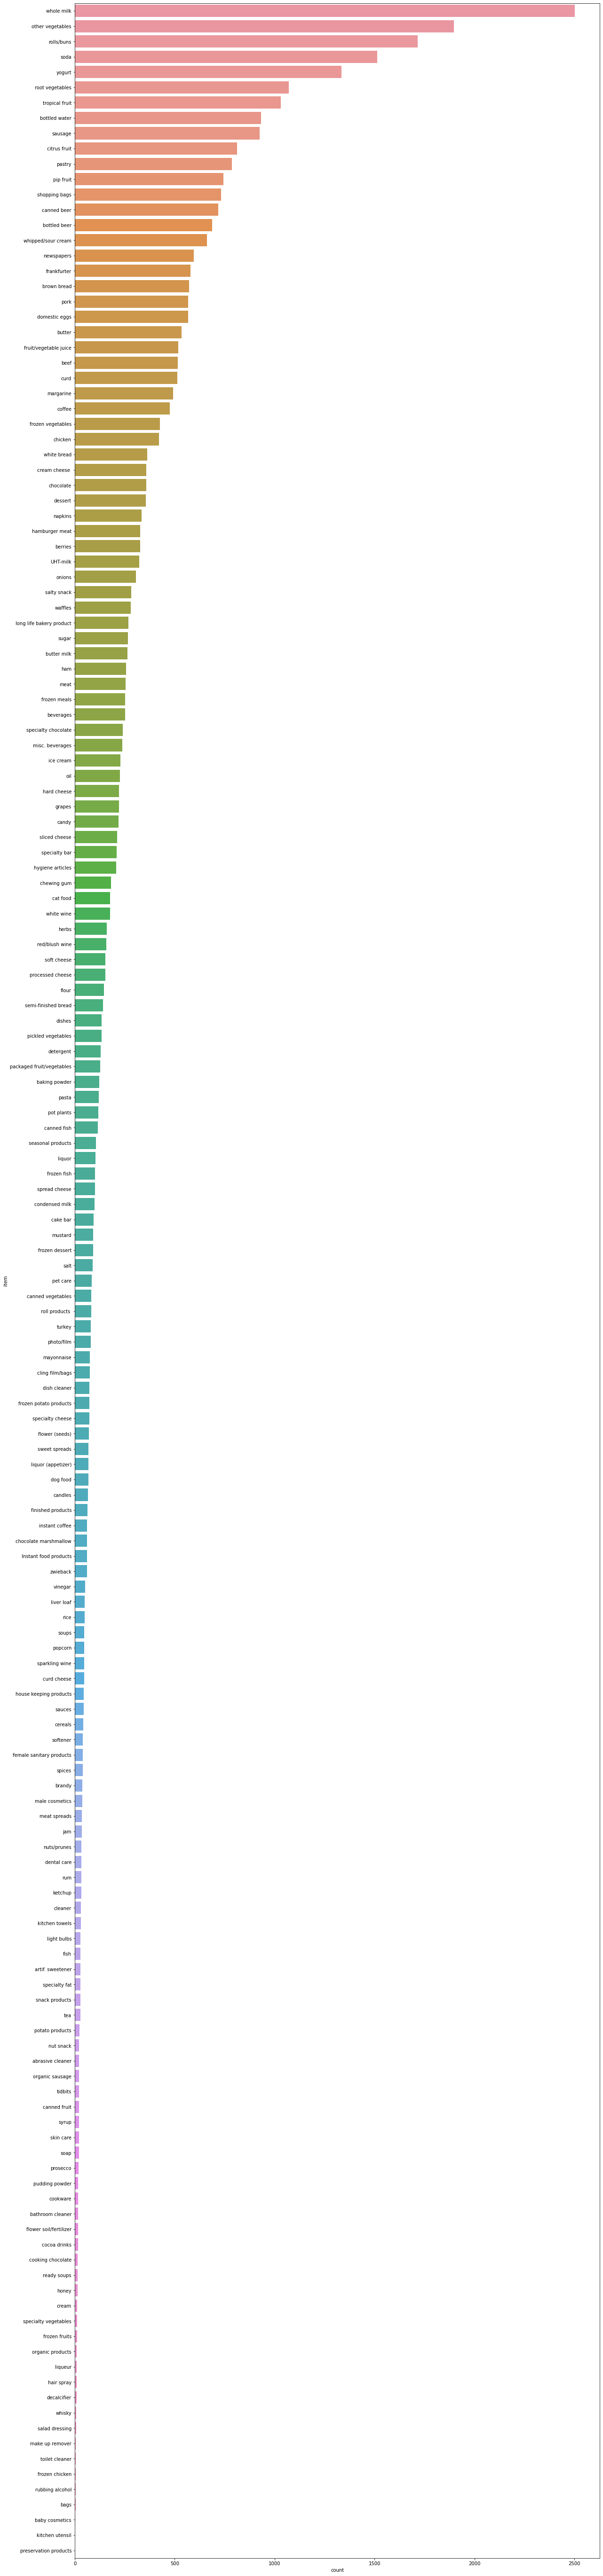

In [15]:
#In this plot, It shows that the frequencies of items.
fig, ax = plt.subplots(figsize=(20, 100))
 
sns.countplot(y = 'item' ,data=data, order = data.item.value_counts().index)
plt.show()

In [16]:
#Also, here I just want to show relationship between member_no and item
data['year'] = pd.to_datetime(data['Date'], infer_datetime_format=True).dt.year
#Grouping the data by years and showing the top 5 items for each year
visualize = data.groupby('year')['item'].value_counts().groupby(level=0, group_keys=False).nlargest(5)

In [17]:
visualize

year  item            
2014  whole milk          1038
      other vegetables     859
      rolls/buns           837
      soda                 777
      yogurt               640
2015  whole milk          1464
      other vegetables    1039
      rolls/buns           879
      sausage              744
      soda                 737
Name: item, dtype: int64

In [18]:
type(visualize)

pandas.core.series.Series

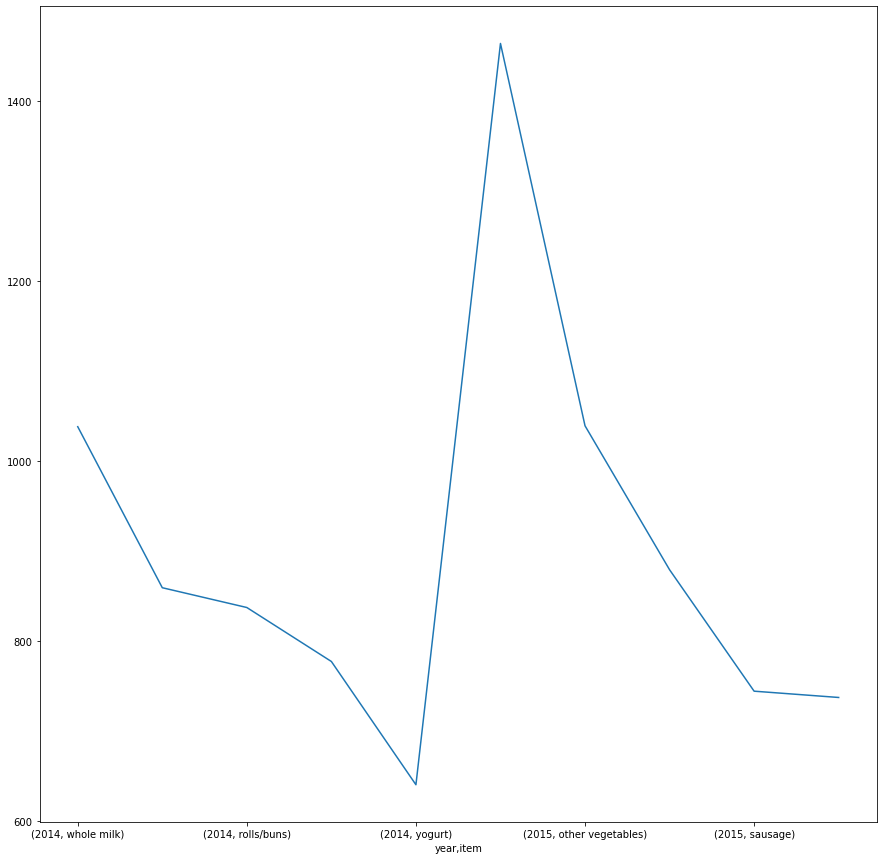

In [19]:
#Here the top sales by year plot to see distribution year,item
fig, ax = plt.subplots(figsize=(15, 15))
visualize.plot()
plt.show()

In [ ]:
"""
After this step, I understood the data and what should I do, I will implement 2 different algorithms according to expected
assignment stages. I will group the data by member no and date then I collect items in a list under item column. After that,
I add all lists to one list for implementing algorithms correctly. 
"""

In [20]:
#I groupped the items according to member_no and date. And converting to dataframe, Member_no as index
data = data.groupby(['Member_no', 'Date'])['item'].apply(list)
data = pd.DataFrame(data)

In [21]:
data

item
Member_no Date                                                         
1000      15-03-2015  [sausage, whole milk, semi-finished bread, yog...
          24-06-2014                  [whole milk, pastry, salty snack]
          24-07-2015                     [canned beer, misc. beverages]
          25-11-2015                        [sausage, hygiene articles]
          27-05-2015                         [soda, pickled vegetables]
...                                                                 ...
4999      24-01-2015  [tropical fruit, berries, other vegetables, yo...
          26-12-2015                             [bottled water, herbs]
5000      09-03-2014                    [fruit/vegetable juice, onions]
          10-02-2015       [soda, root vegetables, semi-finished bread]
          16-11-2014                   [bottled beer, other vegetables]

[14963 rows x 1 columns]

In [22]:
#I added all the list into one list
items = data['item'].tolist()

In [23]:
#Here all item lists in one list that collected from grouped data by member no and date.
items

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [24]:
#Here the first algorithm stage, I used transaction encoder before applying apriori and fpgrowth to dataset of lists
te = TransactionEncoder()
te_ary = te.fit(items).transform(items)
dfApriori = pd.DataFrame(te_ary, columns=te.columns_)
dfApriori

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
#Here the apriori algorithm that calculate support values of itemsets. According to assignment pdf I write mim_support =0.01
frequent_itemsets = apriori(dfApriori, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.021386,(UHT-milk),1
1,0.033950,(beef),1
2,0.021787,(berries),1
3,0.016574,(beverages),1
4,0.045312,(bottled beer),1
...,...,...,...
64,0.010559,"(other vegetables, rolls/buns)",2
65,0.014837,"(other vegetables, whole milk)",2
66,0.013968,"(whole milk, rolls/buns)",2
67,0.011629,"(soda, whole milk)",2


In [26]:
#Here I used second time the encoder to use in fpgrowth algorithm
te2 = TransactionEncoder()
te_ary2 = te2.fit(items).transform(items)
df_fpgrowtg = pd.DataFrame(te_ary2, columns=te2.columns_)
df_fpgrowtg

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
#Here the second algorithm fpgrowth 
frequent_itemsets2 = fpgrowth(df_fpgrowtg, min_support=0.01, use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets2

,support,itemsets,length
0,0.157923,(whole milk),1
1,0.085879,(yogurt),1
2,0.060349,(sausage),1
3,0.051728,(pastry),1
4,0.018780,(salty snack),1
...,...,...,...
64,0.011161,"(yogurt, whole milk)",2
65,0.011629,"(soda, whole milk)",2
66,0.013968,"(whole milk, rolls/buns)",2
67,0.010559,"(other vegetables, rolls/buns)",2


In [28]:
%timeit -n 100 -r 10 apriori(dfApriori, min_support=0.01)

160 ms ± 7.12 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [29]:
%timeit -n 100 -r 10 fpgrowth(df_fpgrowtg, min_support=0.01)

79.8 ms ± 1.72 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


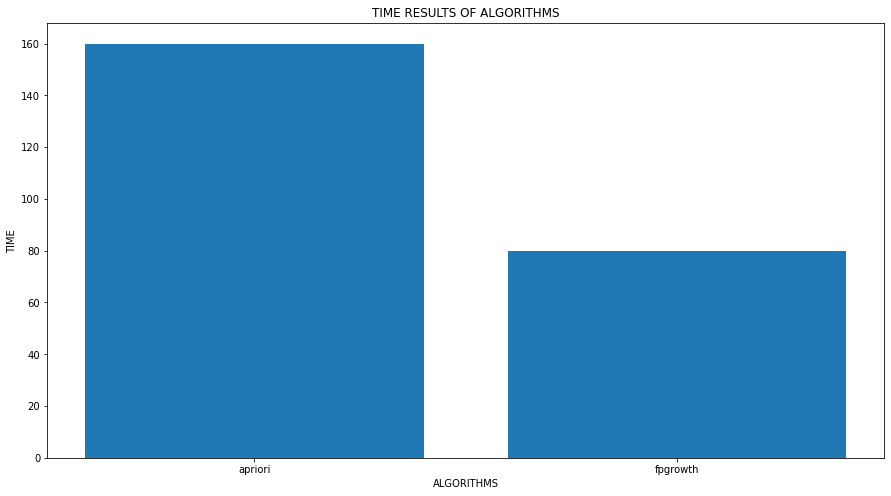

In [3]:
data = {"apriori":160,"fpgrowth":79.8}
fig, ax = plt.subplots(figsize=(15, 8))
plt.title('TIME RESULTS OF ALGORITHMS')
plt.xlabel('ALGORITHMS')
plt.ylabel('TIME')
plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

In [4]:
#As we see the time results of two different algorithms, (also they have time per loop) apriori takes more time than fpgrowth.
# apriori has 7.12 - fpgrowth has 1.72 , time per loops.
"""
In this assignment, we have implemented two different frequent pattern mining algorithm as apriori and fpgrowth which aproach 
the data with different algorithm. In apriori we have more time complexity but less space complexity but, in fpgrowth we have
less time complexity but more space complexity. According to the results, we had hierarchical result with support values. In the
data we had one or more item with frequency. we took min support 0.01 to see detailed frequency values of items. Firstly I grouped
data according to date-member no, than I applied to algorithms the list of item lists. There was no data preprocessing stage 
because the data was clean and there was no nan values.  I just do visualization step to see the distribution of the items 
(according to member no and date) after I just show the bar chart the time complexity of algorithms. As a result that I wrote top,
we see the 2 advantage and disadvantage of algorithms that time-space complexity. 
"""

'\nIn this assignment, we have implemented two different frequent pattern mining algorithm as apriori and fpgrowth which aproach \nthe data with different algorithm. In apriori we have more time complexity but less space complexity but, in fpgrowth we have\nless time complexity but more space complexity. According to the results, we had hierarchical result with support values. In the\ndata we had one or more item with frequency. we took min support 0.01 to see detailed frequency values of items. Firstly I grouped\ndata according to date-member no, than I applied to algorithms the list of item lists. There was no data preprocessing stage \nbecause the data was clean and there was no nan values.  I just do visualization step to see the distribution of the items \n(according to member no and date) after I just show the bar chart the time complexity of algorithms. As a result that I wrote top,\nwe see the 2 advantage and disadvantage of algorithms that time-space complexity. \n'